# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=1yJKgmHrRFnBk987HJfeDrMcTEXtk0z7W"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Employee Retention Prediction
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=10NJUOTWOBzp2MNkgcPpCF0fLtdoN_jKj)

![alt text](https://drive.google.com/uc?id=1evbDHoW2t0emxkbQd8yevYFZ5woJKRPY)

![alt text](https://drive.google.com/uc?id=1Mk2H7VYfv6ijUS9XqEdBQV6_LaHiyvkJ)

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# You have to include the full link to the csv file containing your dataset -- read dataset using pandas
data = pd.read_csv('/content/drive/MyDrive/Business_case/Datasets/HR-Employee-Attrition.csv')

In [4]:
data.sample(5)

,RowNumber,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
380,381,24,No,Travel_Rarely,1371,Sales,10,4,Marketing,1,507,4,Female,77,3,2,Sales Executive,3,Divorced,4260,5915,1,Y,Yes,12,3,4,80,1,5,2,4,5,2,0,3
834,835,34,No,Travel_Rarely,1400,Sales,9,1,Life Sciences,1,1163,2,Female,70,3,2,Sales Executive,3,Married,5714,5829,1,Y,No,20,4,1,80,0,6,3,2,6,5,1,3
481,482,34,No,Travel_Rarely,254,Research & Development,1,2,Life Sciences,1,649,2,Male,83,2,1,Research Scientist,4,Married,3622,22794,1,Y,Yes,13,3,4,80,1,6,3,3,6,5,1,3
54,55,26,No,Travel_Rarely,1443,Sales,23,3,Marketing,1,72,3,Female,47,2,2,Sales Executive,4,Married,4157,21436,7,Y,Yes,19,3,3,80,1,5,2,2,2,2,0,0
557,558,35,No,Non-Travel,1225,Research & Development,2,4,Life Sciences,1,771,4,Female,61,3,2,Healthcare Representative,1,Divorced,5093,4761,2,Y,No,11,3,1,80,1,16,2,4,1,0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   RowNumber                 1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Attrition                 1470 non-null   object
 3   BusinessTravel            1470 non-null   object
 4   DailyRate                 1470 non-null   int64 
 5   Department                1470 non-null   object
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EmployeeCount             1470 non-null   int64 
 10  EmployeeNumber            1470 non-null   int64 
 11  EnvironmentSatisfaction   1470 non-null   int64 
 12  Gender                    1470 non-null   object
 13  HourlyRate                1470 non-null   int64 
 14  JobInvolvement          

In [6]:
data.drop('RowNumber',axis=1,inplace=True)

In [7]:
# 35 features in total, each contains 1470 data points

In [8]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


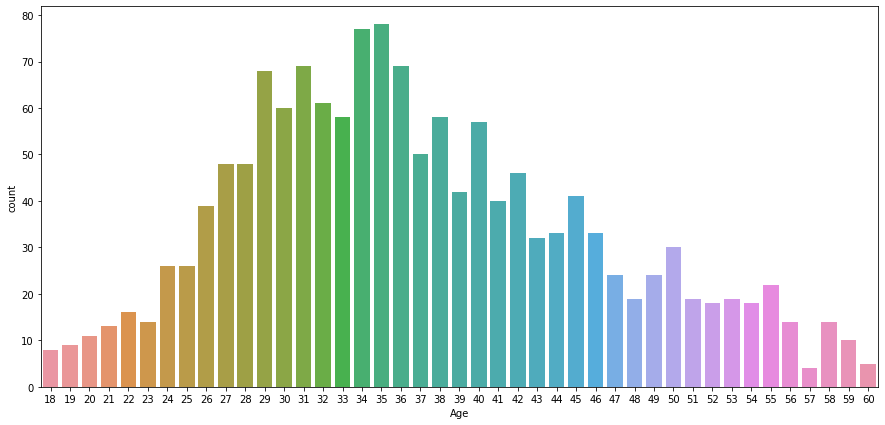

In [9]:
plt.figure(figsize=(15,7))
sns.countplot(data.Age)
plt.show()

# TASK #3: VISUALIZE DATASET

In [10]:
# Let's replace 'Attritition' , 'overtime' , 'Over18' column with integers before performing any visualizations 
data.Attrition.replace({'Yes':1,'No':0},inplace=True)
data.OverTime.replace({'Yes':1,'No':0},inplace=True)
data.Over18.replace({'Y':1,'N':0},inplace=True)

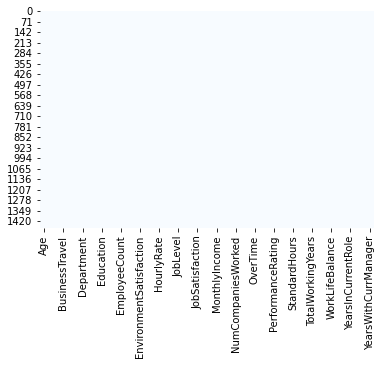

In [11]:
# Let's see if we have any missing data, luckily we don't!
sns.heatmap(data.isnull(),cmap='Blues',cbar=False)

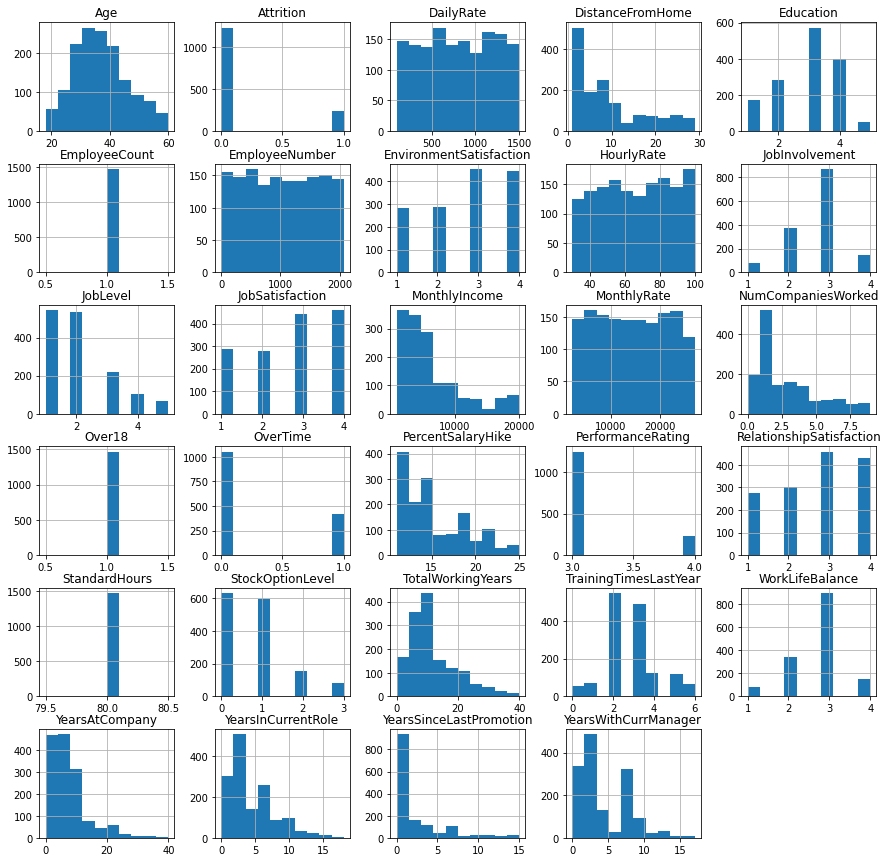

In [12]:
data.hist(figsize=(15,15))
plt.show()

In [13]:
# Several features such as 'MonthlyIncome' and 'TotalWorkingYears' are tail heavy

In [14]:
# It makes sense to drop 'EmployeeCount' , 'Standardhours' and 'Over18' since they do not change from one employee to the other
# Let's drop 'EmployeeNumber' as well


In [15]:
data.drop(['EmployeeCount','StandardHours','Over18'],axis=1,inplace=True)

In [16]:
# Let's see how many employees left the company! 
left_df = data[data.Attrition == 1]
stayed_df = data[data.Attrition == 0]

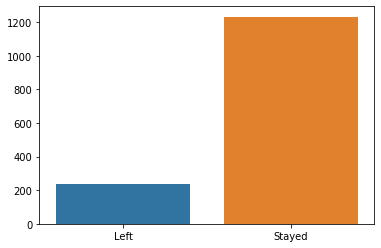

In [17]:
# Count the number of employees who stayed and left
# It seems that we are dealing with an imbalanced dataset 
sns.barplot(x=['Left','Stayed'],y=[len(left_df),len(stayed_df)])

In [18]:
print(f'Total : {len(data)}')
print(f'Left : {len(left_df)} , {len(left_df)/len(data)}%')
print(f'Stayed : {len(stayed_df)} , {len(stayed_df)/len(data)}%')

Total : 1470
Left : 237 , 0.16122448979591836%
Stayed : 1233 , 0.8387755102040816%


In [19]:
left_df.describe()
#  Let's compare the mean and std of the employees who stayed and left 
# 'age': mean age of the employees who stayed is higher compared to who left
# 'DailyRate': Rate of employees who stayed is higher
# 'DistanceFromHome': Employees who stayed live closer to home 
# 'EnvironmentSatisfaction' & 'JobSatisfaction': Employees who stayed are generally more satisifed with their jobs
# 'StockOptionLevel': Employees who stayed tend to have higher stock option level

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,1010.345992,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,0.535865,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,580.750572,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,7208.153264,2.678519,0.499768,3.770294,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,514.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,1017.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,1.000000,1.000000,14.000000,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,1486.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,21081.000000,5.000000,1.000000,17.000000,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,2055.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [20]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,1027.656123,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.64558,0.234388,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,606.217074,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,7102.260749,2.46009,0.423787,3.639511,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,2.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.00000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,483.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,7973.000000,1.00000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,1022.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,14120.000000,2.00000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,1574.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,20364.000000,4.00000,0.000000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26997.000000,9.00000,1.000000,25.000000,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


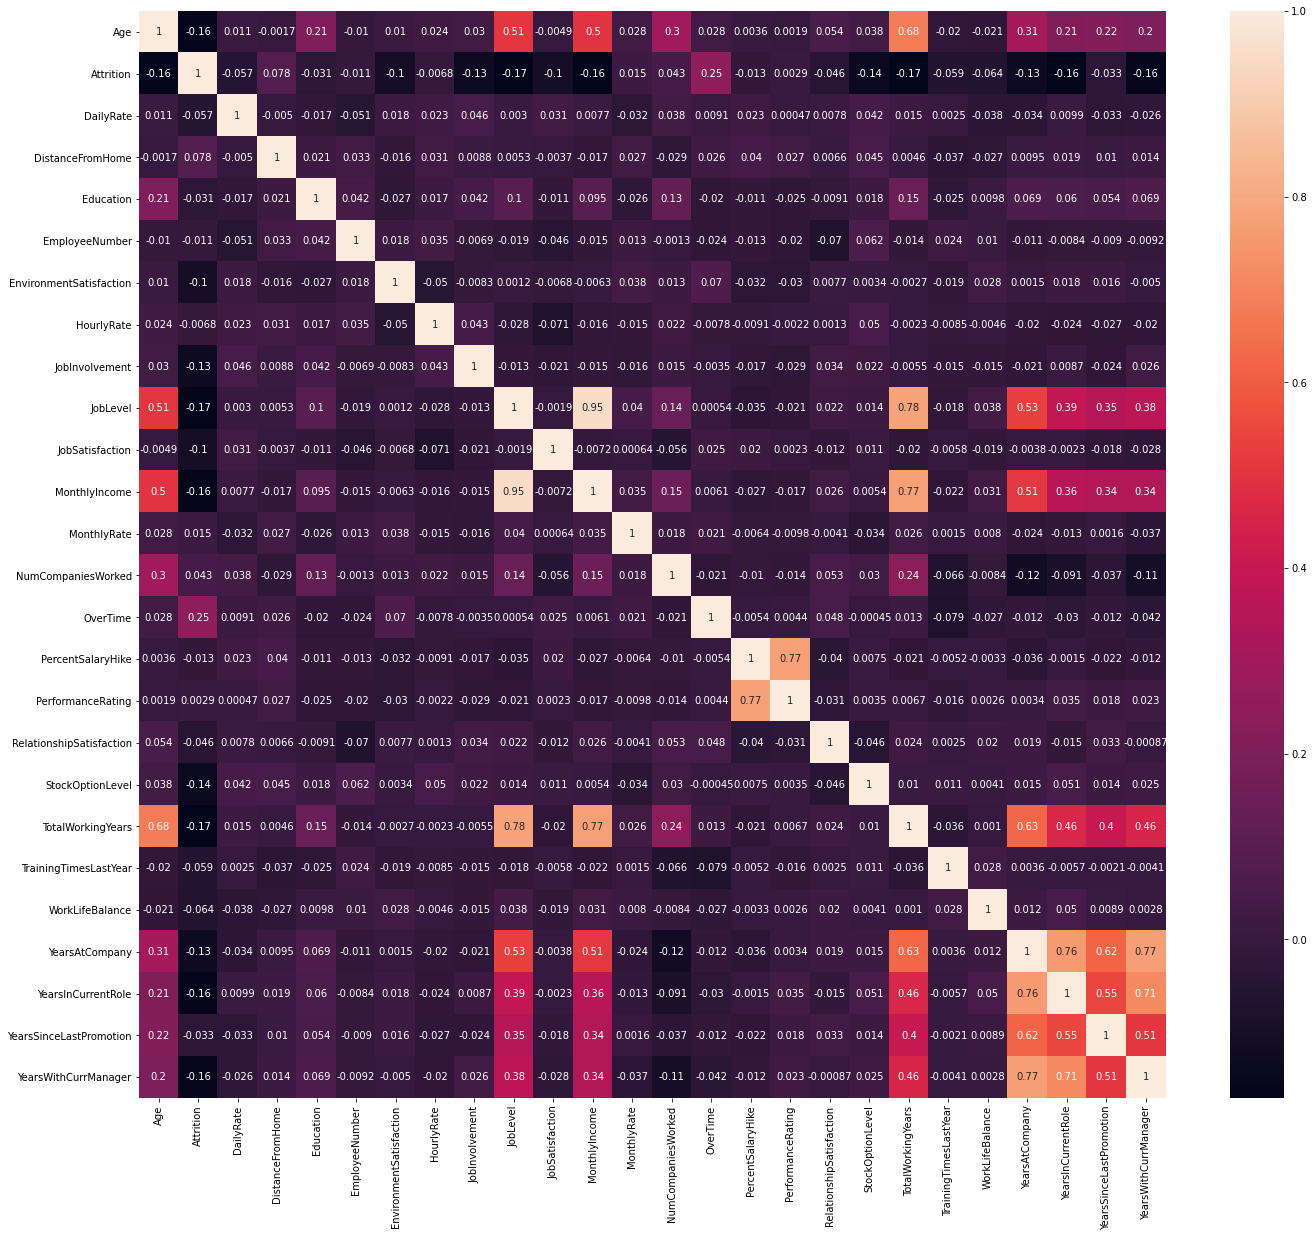

In [21]:
# Job level is strongly correlated with total working hours
# Monthly income is strongly correlated with Job level
# Monthly income is strongly correlated with total working hours
# Age is stongly correlated with monthly income

correlation = data.corr()
ax,fg  = plt.subplots(figsize=(23,20))
sns.heatmap(correlation,annot=True)
plt.show()

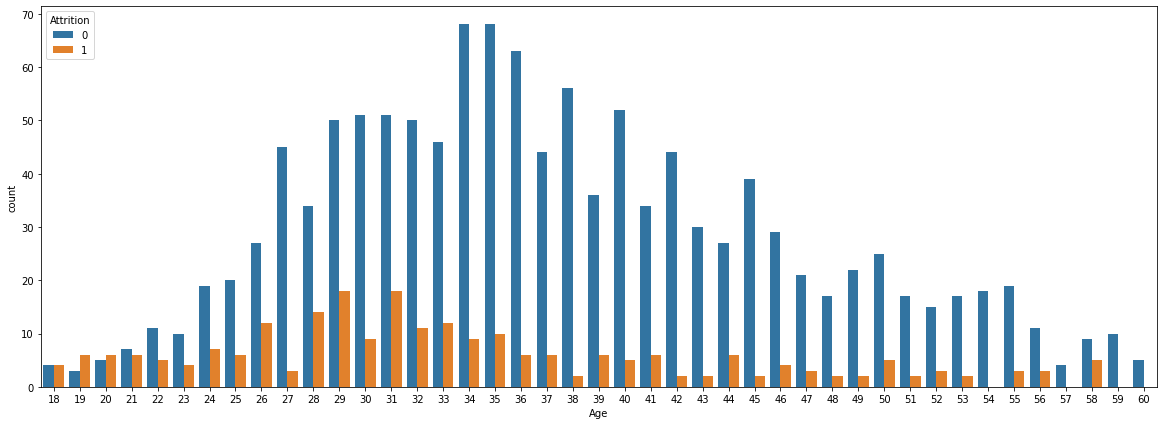

In [22]:
plt.figure(figsize=(20,7))
sns.countplot(x=data.Age,hue=data.Attrition)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

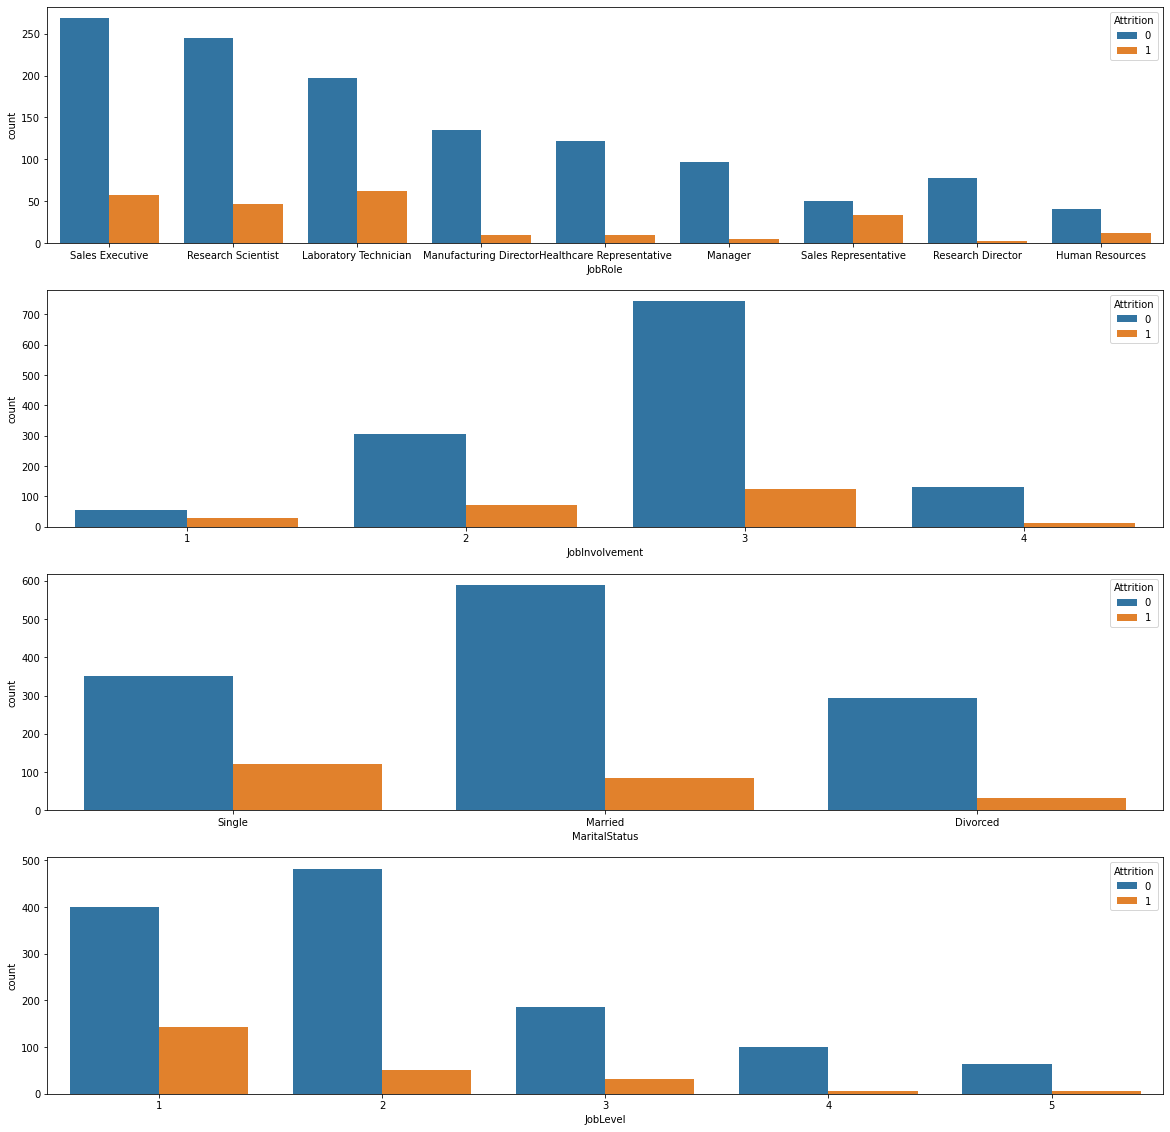

In [23]:
# Single employees tend to leave compared to married and divorced
# Sales Representitives tend to leave compared to any other job 
# Less involved employees tend to leave the company 
# Less experienced (low job level) tend to leave the company

plt.figure(figsize=(20,20))
plt.subplot(411)
sns.countplot(data.JobRole,hue=data.Attrition)

plt.subplot(412)
sns.countplot(data.JobInvolvement,hue=data.Attrition)

plt.subplot(414)
sns.countplot(data.JobLevel,hue=data.Attrition)

plt.subplot(413)
sns.countplot(data.MaritalStatus,hue=data.Attrition)
plt.show()

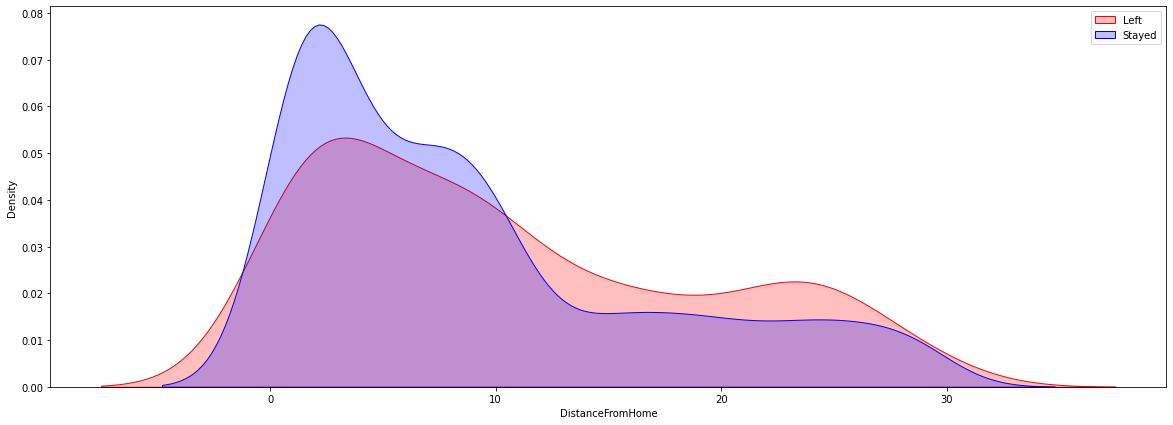

In [24]:
plt.figure(figsize=(20,7))
sns.kdeplot(left_df.DistanceFromHome,shade=True,label='Left',color='r')
sns.kdeplot(stayed_df.DistanceFromHome,shade=True,label='Stayed',color='b')
plt.legend()
plt.show()

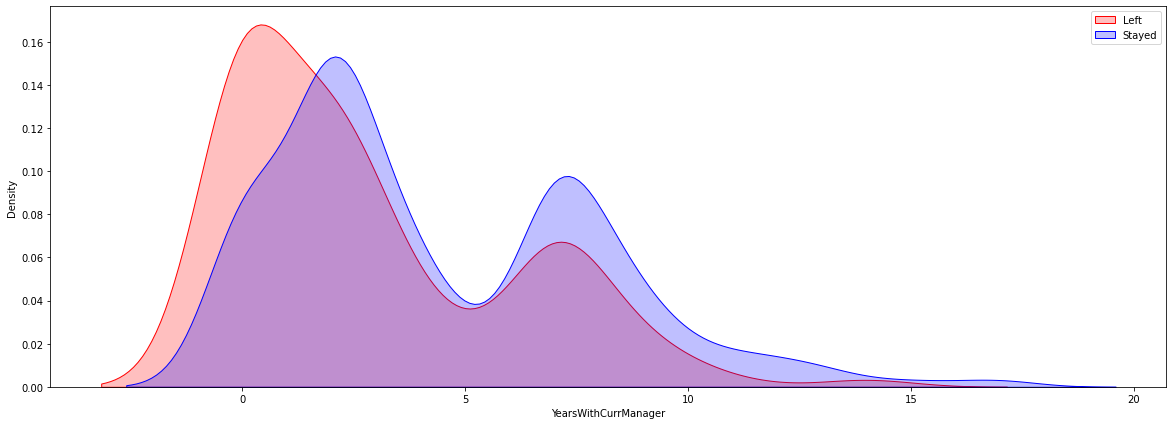

In [25]:
plt.figure(figsize=(20,7))
sns.kdeplot(left_df.YearsWithCurrManager,shade=True,label='Left',color='r')
sns.kdeplot(stayed_df.YearsWithCurrManager,shade=True,label='Stayed',color='b')
plt.legend()
plt.show()

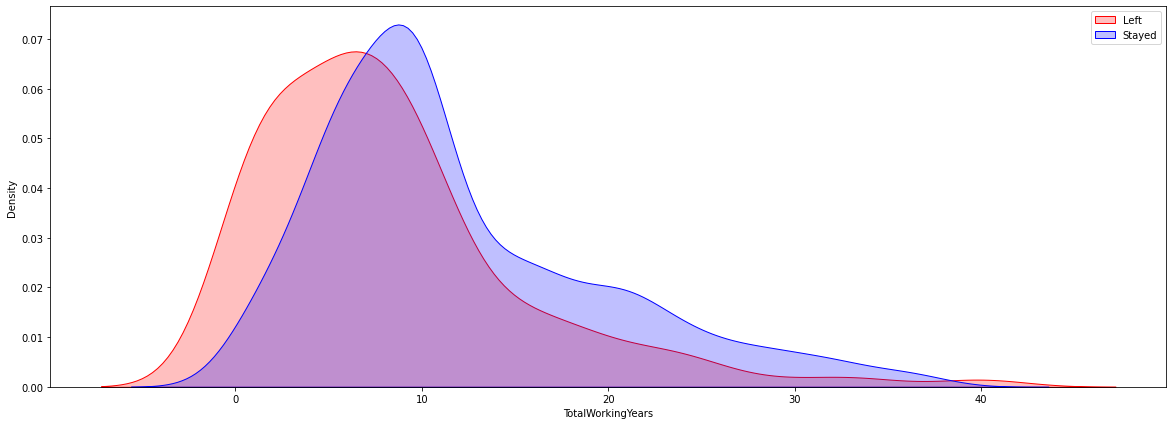

In [26]:
plt.figure(figsize=(20,7))
sns.kdeplot(left_df.TotalWorkingYears,shade=True,label='Left',color='r')
sns.kdeplot(stayed_df.TotalWorkingYears,shade=True,label='Stayed',color='b')
plt.legend()
plt.show()

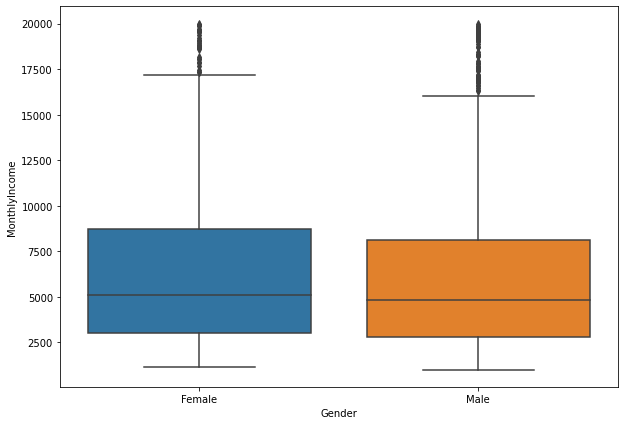

In [27]:
# Let's see the Gender vs. Monthly Income
plt.figure(figsize=(10,7))
sns.boxplot(x=data.Gender,y=data.MonthlyIncome)

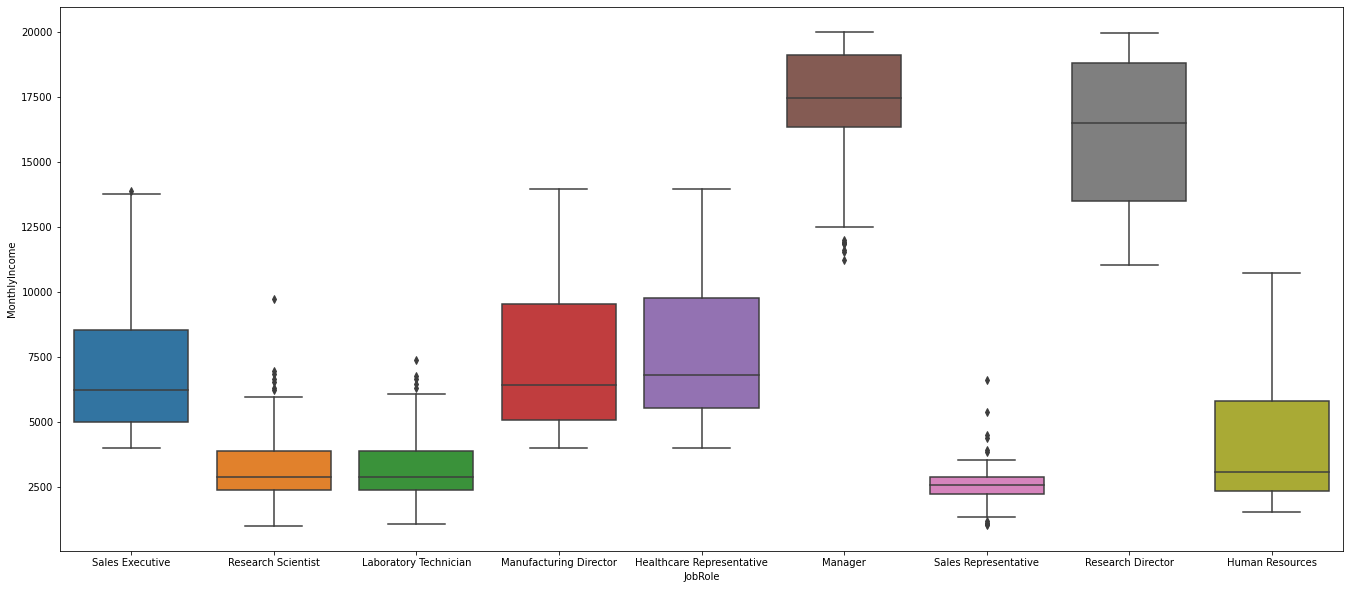

In [28]:
# Let's see the JobRole vs. Monthly Income
plt.figure(figsize=(23,10))
sns.boxplot(x=data.JobRole,y=data.MonthlyIncome)

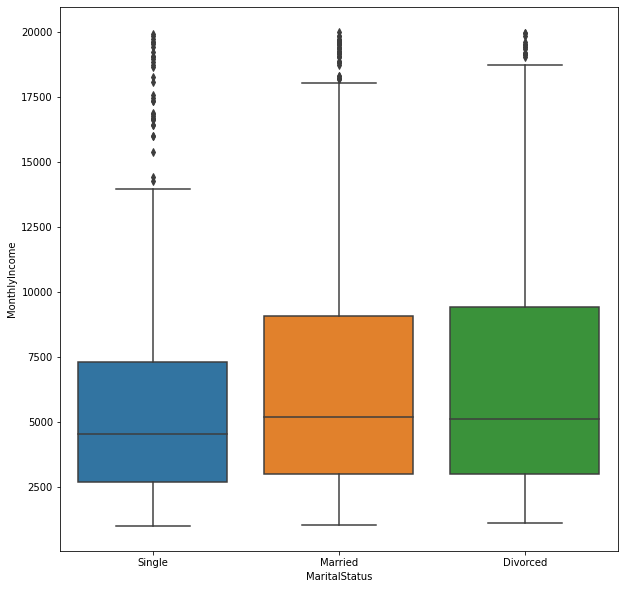

In [29]:
# Let's see the MartialStatus vs. Monthly Income
plt.figure(figsize=(10,10))
sns.boxplot(x=data.MaritalStatus,y=data.MonthlyIncome)

# TASK #4: CREATE TESTING AND TRAINING DATASET & PERFORM DATA CLEANING

In [30]:
data.Gender.replace({'Male':1,'Female':0},inplace=True)

In [31]:
[(x,data[x].nunique()) for x in data.columns]

[('Age', 43),
 ('Attrition', 2),
 ('BusinessTravel', 3),
 ('DailyRate', 886),
 ('Department', 3),
 ('DistanceFromHome', 29),
 ('Education', 5),
 ('EducationField', 6),
 ('EmployeeNumber', 1470),
 ('EnvironmentSatisfaction', 4),
 ('Gender', 2),
 ('HourlyRate', 71),
 ('JobInvolvement', 4),
 ('JobLevel', 5),
 ('JobRole', 9),
 ('JobSatisfaction', 4),
 ('MaritalStatus', 3),
 ('MonthlyIncome', 1349),
 ('MonthlyRate', 1427),
 ('NumCompaniesWorked', 10),
 ('OverTime', 2),
 ('PercentSalaryHike', 15),
 ('PerformanceRating', 2),
 ('RelationshipSatisfaction', 4),
 ('StockOptionLevel', 4),
 ('TotalWorkingYears', 40),
 ('TrainingTimesLastYear', 7),
 ('WorkLifeBalance', 4),
 ('YearsAtCompany', 37),
 ('YearsInCurrentRole', 19),
 ('YearsSinceLastPromotion', 16),
 ('YearsWithCurrManager', 18)]

In [32]:
y = data['Attrition'].values

In [33]:
x = data
x = x.drop(['Attrition'],axis=1)
x = x.values

In [34]:
pd.DataFrame(x).sample(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
1317,27,Travel_Frequently,1297,Research & Development,5,2,Life Sciences,1850,4,0,53,3,1,Laboratory Technician,4,Single,2379,19826,0,1,14,3,3,0,6,3,2,5,4,0,2
1436,21,Travel_Rarely,501,Sales,5,1,Medical,2021,3,1,58,3,1,Sales Representative,1,Single,2380,25479,1,1,11,3,4,0,2,6,3,2,2,1,2


In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,3,6,13,15])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [36]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25)

for train_index, test_index in split.split(x, y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [89]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [90]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# TASK #5: UNDERSTAND THE INTUITION BEHIND LOGISTIC REGRESSION CLASSIFIERS, ARTIFICIAL NEURAL NETWORKS, AND RANDOM FOREST CLASSIFIER

![alt text](https://drive.google.com/uc?id=19DpnhFkfsNEDPlH1dkfdr1zO36vRcBit)

![alt text](https://drive.google.com/uc?id=1J03xZf6OiYtGV3IgJBUURBWyScpvaAbU)

![alt text](https://drive.google.com/uc?id=1WNsznVn7je5r9HGnSLLdABICxrIv2Mrs)

![alt text](https://drive.google.com/uc?id=1bX5uGmy5vbYTlp7m4tw_V2kTNzAHpHLp)

![alt text](https://drive.google.com/uc?id=1ztrMNehNYWMw6NwhOOC9BDBdnoNirpqZ)

# TASK #6: UNDERSTAND HOW TO ASSESS CLASSIFICATION MODELS 

![alt text](https://drive.google.com/uc?id=1OZLbKm1AJSyvoBgfvlfcLIWZxLOvzOWq)

![alt text](https://drive.google.com/uc?id=11pNdVw4oWeNOWrkadrrxon7FU4qO5m6U)

![alt text](https://drive.google.com/uc?id=1Bk1xFW2tGBdwg-njOhw79MxtYBQnK-6x)

![alt text](https://drive.google.com/uc?id=19cXoBqSiqbEGNofnD603bz3xEAsX28hy)

# TASK #7: TRAIN AND EVALUATE A LOGISTIC REGRESSION CLASSIFIER

In [39]:
from sklearn.metrics import confusion_matrix , classification_report

In [91]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [92]:
y_pred = lr.predict(x_test)

In [42]:
xm = np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),axis=1)
pd.DataFrame(xm,columns=["True","Predicted"])

,True,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
289,0,0
290,1,0
291,0,0
292,1,1


In [93]:
print(lr.score(x_test,y_test))

0.8503401360544217


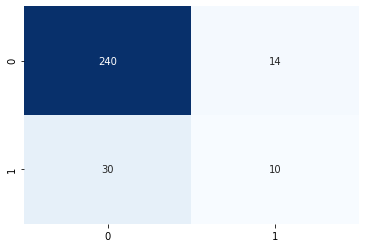

In [94]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,cmap="Blues",cbar=False,annot=True,fmt='0g')

In [95]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       254
           1       0.42      0.25      0.31        40

    accuracy                           0.85       294
   macro avg       0.65      0.60      0.61       294
weighted avg       0.82      0.85      0.83       294



# TASK #8: TRAIN AND EVALUATE A RANDOM FOREST CLASSIFIER

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
model = RandomForestClassifier(n_estimators=100,criterion='entropy')
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

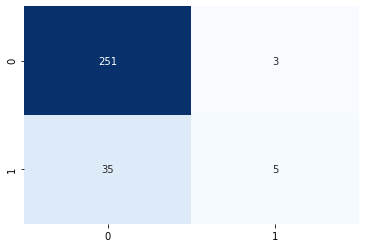

In [97]:
# Testing Set Performance
y_pred = model.predict(x_test)

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,cmap="Blues",cbar=False,annot=True,fmt='0g')

In [98]:
print(f'Accuracy = {model.score(x_test,y_test)}%')

Accuracy = 0.8707482993197279%


In [99]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       254
           1       0.62      0.12      0.21        40

    accuracy                           0.87       294
   macro avg       0.75      0.56      0.57       294
weighted avg       0.84      0.87      0.83       294



# TASK #9: TRAIN AND EVALUATE A DEEP LEARNING MODEL 

In [143]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [152]:
ann = Sequential()

ann.add(Dense(units=20,activation='relu'))
ann.add(Dense(units=6,activation='relu'))
ann.add(Dense(units=1,activation='sigmoid'))

In [153]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [154]:
hist = ann.fit(x_train,y_train,batch_size=50,epochs=30)

Epoch 1/30
24/24 [==============================] - 1s 2ms/step - loss: 0.7656 - accuracy: 0.2842
Epoch 2/30
24/24 [==============================] - 0s 2ms/step - loss: 0.6684 - accuracy: 0.5891
Epoch 3/30
24/24 [==============================] - 0s 2ms/step - loss: 0.6100 - accuracy: 0.7658
Epoch 4/30
24/24 [==============================] - 0s 1ms/step - loss: 0.5598 - accuracy: 0.8258
Epoch 5/30
24/24 [==============================] - 0s 2ms/step - loss: 0.5102 - accuracy: 0.8381
Epoch 6/30
24/24 [==============================] - 0s 2ms/step - loss: 0.4401 - accuracy: 0.8703
Epoch 7/30
24/24 [==============================] - 0s 1ms/step - loss: 0.4053 - accuracy: 0.8537
Epoch 8/30
24/24 [==============================] - 0s 1ms/step - loss: 0.3571 - accuracy: 0.8734
Epoch 9/30
24/24 [==============================] - 0s 2ms/step - loss: 0.3138 - accuracy: 0.8878
Epoch 10/30
24/24 [==============================] - 0s 2ms/step - loss: 0.2972 - accuracy: 0.8909
Epoch 11/30
24/24 [

In [156]:
__,acc_train = ann.evaluate(x_train,y_train,verbose=0)
__,acc_test = ann.evaluate(x_test,y_test,verbose=0)
print(f'train acc = {acc_train*100}')
print(f'test acc = {acc_test*100}')

train acc = 93.70748400688171
test acc = 88.77550959587097


In [56]:
y_pred = (ann.predict(x_test)>0.5)
mx = np.concatenate((y_test.reshape(-1,1),y_pred.reshape(-1,1)),axis=1)
pd.DataFrame(mx,columns=["True","Predicted"])

,True,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
289,0,0
290,1,0
291,0,0
292,1,1


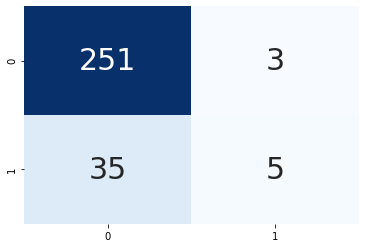

In [157]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,cmap="Blues",cbar=False,annot=True,annot_kws={'size':30},fmt='0g')

In [158]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       254
           1       0.62      0.12      0.21        40

    accuracy                           0.87       294
   macro avg       0.75      0.56      0.57       294
weighted avg       0.84      0.87      0.83       294



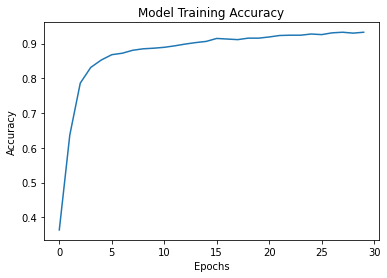

In [164]:
plt.plot(hist.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Training Accuracy')
plt.show()

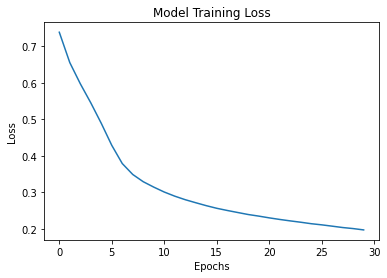

In [165]:
plt.plot(hist.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Loss')
plt.show()